# Exploratory Data Analysis

With the datasets we created, we will explore them to darw some insights. 

We proposed in the notebook NLPCleaning.ipynb some Analysis Ideas :
1. Study the content as it is. Even if it is not complete, we can considere in our analysis the first sentences present in this dataset. NLP technique can be easily applied here.
2. NLP techniques applied to headlines. 
3. Count mentions/hashtags in posts
4. Influence of media presence (media or not : 1-0)
5. NLP to About section
6. Relation between number of followers & reactions/comments
7. Influence of the media type

Reactions & Comments will be the main insight to define if a post was good or not. 

This list is not exhaustive, and more ideas can be found later in the analysis.

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Non-NLP analysis

In this section, let's watch the data without considering NLP. 

In [2]:
cleanedData = pd.read_pickle('cleaned_data.pkl')         
cleanedData.head(3)   

,name,headline,about,content,content_links,media_url,num_hashtags,hashtags,reactions,comments,Locations,Followers,Time_spent,Media_type
0,Nicholas Wyman,CEO IWSI Group,Nicholas Wyman for the past 25 years has shone...,Robert Lerman writes that achieving a healthy...,[['https://www.linkedin.com/in/ACoAAACy1HkBviR...,['https://www.urban.org/urban-wire/its-time-mo...,4,"[['#workbasedlearning', 'https://www.linkedin....",12,1,Unknown,6484.0,1 day ago,article
1,Nicholas Wyman,CEO IWSI Group,Nicholas Wyman for the past 25 years has shone...,"National disability advocate Sara Hart Weir, ...",[['https://www.linkedin.com/in/ACoAAAHsfJgBb7_...,[],0,[],11,0,Unknown,6484.0,1 week ago,none
3,Nicholas Wyman,CEO IWSI Group,Nicholas Wyman for the past 25 years has shone...,Exploring in this months Talent Management & H...,[['https://www.linkedin.com/in/ACoAAAADlGIBLfn...,['https://www.tlnt.com/apprenticeships-that-br...,4,"[['#careerplanning', 'https://www.linkedin.com...",44,0,Unknown,6484.0,2 months ago,article


### Overview of the authors

In [3]:
#Let's draw the authors relatively to their number of followers and reaction means

#Reactions and followers means for each authors
authorsDf = pd.pivot_table(cleanedData,index="name",values=["reactions","Followers"],aggfunc='mean')

C:\Users\Jeremy\AppData\Local\Temp/ipykernel_7312/2590164831.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(k) for k in current_values])
C:\Users\Jeremy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127945 (\N{RUGBY FOOTBALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


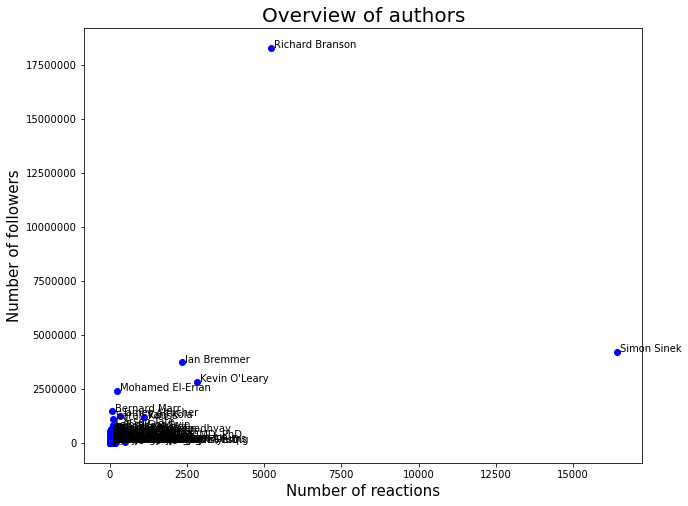

In [4]:
#Plot
plt.rcParams['figure.figsize'] = [10, 8]

for author in authorsDf.index:
    x = authorsDf.reactions.loc[author]
    y = authorsDf.Followers.loc[author]
    plt.scatter(x, y, color='blue')
    plt.text(x+100, y+100, author, fontsize=10)

plt.title('Overview of authors', fontsize=20)
plt.xlabel('Number of reactions', fontsize=15)
plt.ylabel('Number of followers', fontsize=15)

#Format yaxis to avoid scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(k) for k in current_values])

plt.show()

**Observation**  
As we can see, Simon Sinek & Richard Branson are outliers.  
Simon Sinek has a lot of reactions whereas Richard Branson has a lot of followers.  
But both have more than other authors.  

Let's draw the log view to attenuate this discrepancy

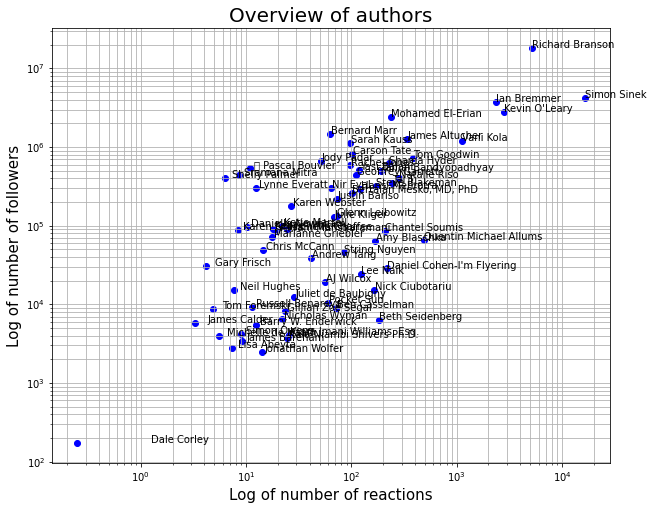

In [5]:
#Plot
plt.rcParams['figure.figsize'] = [10, 8]

for author in authorsDf.index:
    x = authorsDf.reactions.loc[author]
    y = authorsDf.Followers.loc[author]
    plt.scatter(x, y,color='Blue')
    plt.text(x+1, y+1, author, fontsize=10)

plt.title('Overview of authors', fontsize=20)
plt.xlabel('Log of number of reactions', fontsize=15)
plt.ylabel('Log of number of followers', fontsize=15)

# Set logarithmic scale on the both variables
ax=plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")

#Grid
plt.grid(visible=True,which='both')

#Format yaxis to avoid scientific notation
# plt.gca().set_yticklabels('{:.0f}'.format())

plt.show()

**Observation**  

**I**  
We observe a  relation between the number of followers & reactions.   
The higher the number of followers, the higher the number of reactions, following a power law :

$ n_{followers} = k n_{react} ^ \mu $ with $(k,\mu)$ constants

To keep it simple, it is needed a lot of followers to have a good quantity of reactions.  

This is pretty logical because people just watch content of influencers they follow but don't react to their posts. 

**II**

Therefore, in our analysis, which is understanding what makes a Linkedin post good, we should study one author's posts at a time.  

Also we could express if a post is good or not with the following relationship, in order to normalize observations when we will compare authors each others :

$ attractivity = \frac{\#reactions + \#comments}{\#followers} $

**Attractivity**

This value will allow us to compare features accross authors.

In [6]:
#Let's use the formula above, in %
cleanedData['Attractivity'] = 100*(cleanedData.reactions + cleanedData.comments) / cleanedData.Followers

**Let's remove Sinek & Branson**

In [7]:
dataNoOutliers = cleanedData.loc[(cleanedData.name != "Simon Sinek") & (cleanedData.name != 'Richard Branson')]

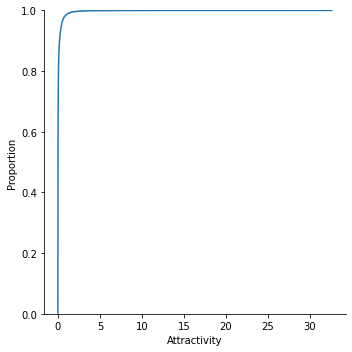

In [8]:
#With outliers
sns.displot(data=cleanedData,x='Attractivity',kind='ecdf')

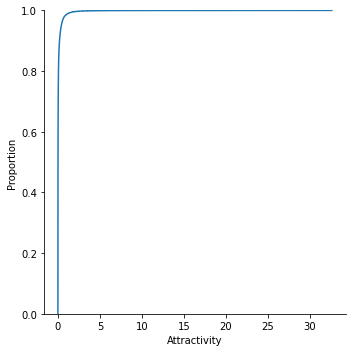

In [9]:
#Without outliers
sns.displot(data=dataNoOutliers,x='Attractivity',kind='ecdf')

In [10]:
dataNoOutliers.Attractivity.max()

32.59060402684564

**Observations**  

Even after removing Sinek & Branson, we still have outliers.  
Let's check that

In [11]:
PivotTable = pd.pivot_table(data=cleanedData, index='name', values=['reactions',"Followers","Attractivity",'comments'],aggfunc='max')
PivotTable.sort_values(by="Attractivity",ascending=False)

,Attractivity,Followers,comments,reactions
name,,,,
Kaia Niambi Shivers Ph.D.,32.590604,3.725000e+03,71,1143
Nick Ciubotariu,22.579373,1.521300e+04,284,3151
Lee Naik,20.094031,2.446000e+04,481,4434
Quentin Michael Allums,19.799057,6.638700e+04,2544,10600
Ben Casselman,15.165512,9.093000e+03,356,1023
...,...,...,...,...
Karen Webster,0.102043,1.783560e+05,34,175
🏉 Pascal Bouvier,0.087999,5.465970e+05,73,410
Bernard Marr,0.040284,1.462121e+06,322,565


**Observations**  

As we can see, there are some outliers in term of attractivity even if it is not Sinek or Branson.  
Attractivity is maybe not a good feature to analyse our data.  

Therefore, for the sake of our study, it would be better to not compare authors, but to take them individually, and see if we can highlight some patterns across these authors.

### Influence of the media presence in a post

Here, we are going to check if adding a media in the post has an influence on the attractivity.

In [12]:
#First of all, let's count how many times are used each media in this dataset
cleanedData.Media_type.value_counts()

article       14590
image          8614
none           5889
video          2674
document        110
poll             82
entity           31
newsletter        4
view              2
Name: Media_type, dtype: int64

Articles, images and videos are majoritarly used in posts.  
We note also a lot of posts without media.

Let's see what the influence of a media on the attractivity. 

In [13]:
#Let's create a new column 0 for no media, 1 if a media
cleanedData['Media_in_post'] = cleanedData.Media_type.apply(lambda x: 0 if x=="none" else 1)

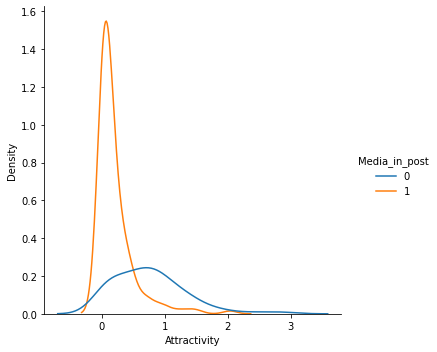

In [14]:
#Distribution for one author : Simon Sinek
sns.displot(data=cleanedData.loc[cleanedData.name == "Simon Sinek"],x='Attractivity',hue='Media_in_post',kind='kde')

**Observations** 

For one author, we note that using a media in the post increases the attractivity.  
We note also that it increases the variance too.  
So we can considere that using a media doesn't ensure that the post will have more reactions, but tends to.

Because of the high number of different authors (68), we create a dataframe of average Attractivity depending on the presence or not of a media in the post.

In [15]:
#Create the dataframe
MediaAttractivity = pd.DataFrame()
MediaAttractivity["Author"] = cleanedData.name.unique()

#Use pivot table to obtain average attractivity
PivotTableAttractivityMean = pd.pivot_table(data=cleanedData,index='name',columns='Media_in_post',values='Attractivity',aggfunc='mean')
#Add attractivity means to the dataframe
MediaAttractivity['Avg_Attract_NoMedia'] = np.array(PivotTableAttractivityMean[0])
MediaAttractivity['Avg_Attract_Media'] = np.array(PivotTableAttractivityMean[1])

#Add the difference between Media & NoMedia in %
MediaAttractivity['Diff_Media_Avg%'] = 100 * (MediaAttractivity['Avg_Attract_Media'] - MediaAttractivity['Avg_Attract_NoMedia'])/MediaAttractivity['Avg_Attract_NoMedia']

#Calculate also the variance
PivotTableAttractivityVariance = pd.pivot_table(data=cleanedData,index='name',columns='Media_in_post',values='Attractivity',aggfunc='var')
MediaAttractivity['Var_Attract_NoMedia'] = np.array(PivotTableAttractivityVariance[0])
MediaAttractivity['Var_Attract_Media'] = np.array(PivotTableAttractivityVariance[1])

#Difference of variances
MediaAttractivity['Diff_Media_Var%'] = 100 * (MediaAttractivity['Var_Attract_Media'] - MediaAttractivity['Var_Attract_NoMedia'])/MediaAttractivity['Var_Attract_NoMedia']

In [16]:
MediaAttractivity

,Author,Avg_Attract_NoMedia,Avg_Attract_Media,Diff_Media_Avg%,Var_Attract_NoMedia,Var_Attract_Media,Diff_Media_Var%
0,Nicholas Wyman,0.338293,0.416448,23.102937,0.374618,0.191829,-48.793396
1,Jonathan Wolfer,0.052674,0.378409,618.397997,0.002443,0.044621,1726.405676
2,Karen Gross,0.090432,0.115388,27.595532,0.006671,0.017940,168.908467
3,Kaia Niambi Shivers Ph.D.,0.297353,0.269192,-9.470455,0.158750,0.247783,56.083278
4,Daniel Cohen-I'm Flyering,1.126141,1.081418,-3.971354,2.891937,5.597374,93.551037
...,...,...,...,...,...,...,...
63,Quentin Michael Allums,0.072650,0.034469,-52.554341,0.012890,0.001587,-87.690157
64,AJ Wilcox,0.080693,0.102754,27.340108,0.006586,0.088367,1241.699171
65,Kevin O'Leary,0.018051,0.027062,49.918334,0.001982,0.002328,17.454367
66,Amy Blaschka,0.036735,0.021744,-40.810306,0.001333,0.000425,-68.134394


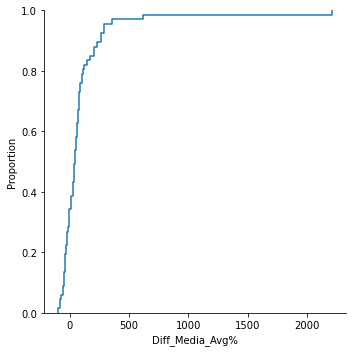

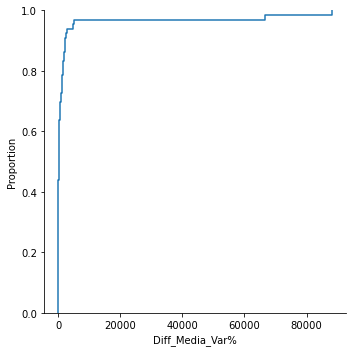

In [17]:
#Let's plot distributions
sns.displot(data=MediaAttractivity,x="Diff_Media_Avg%",kind='ecdf')
sns.displot(data=MediaAttractivity,x="Diff_Media_Var%",kind='ecdf')

**Observations**  

As we can see, some authors are outliers in term of Attractivity difference.  
Let's check these authors

In [18]:
#Check this outliers : Avg
quantileAvg = MediaAttractivity['Diff_Media_Avg%'].quantile(q=0.95)
MediaAttractivity.loc[MediaAttractivity['Diff_Media_Avg%'] >= quantileAvg]

,Author,Avg_Attract_NoMedia,Avg_Attract_Media,Diff_Media_Avg%,Var_Attract_NoMedia,Var_Attract_Media,Diff_Media_Var%
1,Jonathan Wolfer,0.052674,0.378409,618.397997,0.002443,0.044621,1726.405676
12,Michelle Chaffee,0.204970,0.939667,358.441801,0.079282,1.162754,1366.598893
19,Ian Bremmer,0.019128,0.074649,290.263030,0.000319,0.213016,66700.389428
58,Juliet de Baubigny,0.002703,0.062395,2208.371041,0.000008,0.006896,88151.674174


In [19]:
#Check this outliers : Var
quantileVar = MediaAttractivity['Diff_Media_Var%'].quantile(q=0.95)
MediaAttractivity.loc[MediaAttractivity['Diff_Media_Var%'] >= quantileVar]

,Author,Avg_Attract_NoMedia,Avg_Attract_Media,Diff_Media_Avg%,Var_Attract_NoMedia,Var_Attract_Media,Diff_Media_Var%
19,Ian Bremmer,0.019128,0.074649,290.263030,0.000319,0.213016,66700.389428
28,Marianne Griebler,0.351976,0.774049,119.915254,0.269617,13.380212,4862.664941
34,Gillian Zoe Segal,0.260805,0.802110,207.551708,0.041255,2.137030,5079.997622
58,Juliet de Baubigny,0.002703,0.062395,2208.371041,0.000008,0.006896,88151.674174


**Observations**

It seems there some outliers, above a quantile of 95% (especially Juliette de Baubigny)  
Let's remove these authors for this analysis.

In [20]:
#Take these names into a list
OutlierAuthors = ['Jonathan Wolfer','Michelle Chaffee','Ian Bremmer','Juliet de Baubigny','Marianne Griebler','Gillian Zoe Segal']

In [21]:
#Change index into authors'name
MediaAttractivity = MediaAttractivity.set_index('Author')

In [22]:
#Drop the outlier
MediaAttractivity.drop(index=OutlierAuthors,inplace=True) #Inplace means no copy created

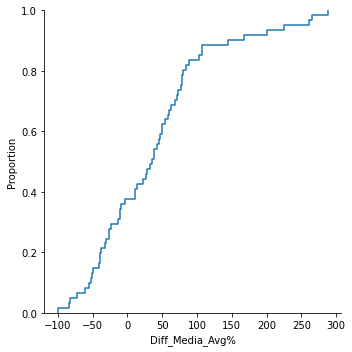

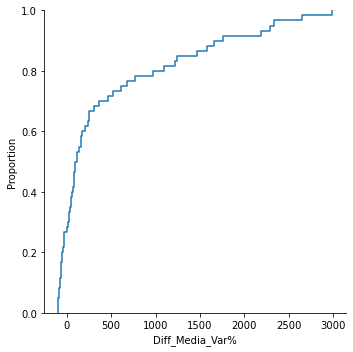

In [23]:
#Check distribution again
sns.displot(data=MediaAttractivity,x="Diff_Media_Avg%",kind='ecdf')
sns.displot(data=MediaAttractivity,x="Diff_Media_Var%",kind='ecdf')

In [24]:
#Now let's calculate the mean of differences across authors, in % compared to NoMedia
MediaAttractivityDiffAvg = MediaAttractivity['Diff_Media_Avg%'].mean()
MediaAttractivityDiffVar = MediaAttractivity['Diff_Media_Var%'].mean()
print('In average, adding a media increases the attractivity of a post by {:.2f} %'.format(MediaAttractivityDiffAvg))
print('And the variance by {:.2f} %'.format(MediaAttractivityDiffVar))

In average, adding a media increases the attractivity of a post by 38.55 %
And the variance by 476.62 %


**Observations**

So, for 95% of authors, we observe a significant increase in attractivity, about 39%, by adding a media in the post. 

**However**, this result has to be taken with cautious, because the variance increases a lot too, meaning that adding a media doesn't enure to have a better attractivity. 

*Therefore, let's test this hypothesis.*

**Hypothesis test**

First of all, let's formulate our hypothesis, with $\mu$ the hypothesis mean

$ H_0 $ : Media doesn't improve attractivity => $\mu \le 0\%$  
$ H_1 $ : Media improves attractivity => $\mu > 0\%$

We take a significance level $\alpha = 0.05$.  
This value defines the degree of confidence we have in our hypothesis test.  
For instance, we will be sure at 95% that our decision will be correct (True positive). 

The test is one-sided.

The distribution follows a Normal Distribution.  
We can therefore use a Z-test. 

$ Z= \frac{\bar{x} - \mu}{s / \sqrt n} $

with :
* $\bar{x}$ the sample mean
* $s$ the sample standard type
* $n$ the sample size

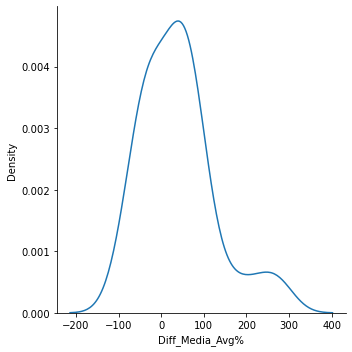

In [25]:
#% increase distribution
sns.displot(data=MediaAttractivity,x="Diff_Media_Avg%",kind='kde')

In [26]:
mu = 0 #Hypothesis mean
s = MediaAttractivity['Diff_Media_Avg%'].std() #Standard type
n = MediaAttractivity.shape[0] #Sample size

#Z-score
Z = (MediaAttractivityDiffAvg - mu) / (s / np.sqrt(n))

print('Z-score =',Z)

Z-score = 3.5188783229488854


After checking the Z-table, we got a value of 0.99978 > 0.95.  
Which means $H_0$ is rejected :

**Adding a media in the post tends to increase the attractivity of the post.**


*Is this still true if we consider an increase of 30%*

To verify that, let's do another hypothesis test :

$H_0$ : $<30\%$  
$H_1$ : $>=30\%$

We keep a significance level $\alpha = 0.05$

In [27]:
mu = 30 #Hypothesis mean
s = MediaAttractivity['Diff_Media_Avg%'].std() #Standard type
n = MediaAttractivity.shape[0] #Sample size

#Z-score
Z = (MediaAttractivityDiffAvg - mu) / (s / np.sqrt(n))

print('Z-score =',Z)

Z-score = 0.7806992681896487


**However**, we can't say that posting a media increases more than 30% the post attractivity.  


A Z-score > 2 is a good value to consider $H_0$ as rejected.  
In our case, it would be an increase of around **16%**


In [28]:
mu = 16 #Hypothesis mean
s = MediaAttractivity['Diff_Media_Avg%'].std() #Standard type
n = MediaAttractivity.shape[0] #Sample size

#Z-score
Z = (MediaAttractivityDiffAvg - mu) / (s / np.sqrt(n))

print('Z-score =',Z)

Z-score = 2.0585161604106257


**Conclusions**

Adding a media in the post increases by around **16%** the attractivity, with a 95% confidence. 

*Note*  
This confidence means : if we take 100 samples, 95 times we will find that adding a medium increases by at least 16% the attractivity.